<a href="https://colab.research.google.com/github/GhazalehKeyvani/Data-Science-Exercises/blob/main/DL4_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ghazaleh Keyvani
---

### ۱. پیش‌بینی سری زمانی تکمتغیره (Univariate Single-Step)
**مشخصات:**
- ورودی: تنها از مقادیر گذشته یک متغیر استفاده میکند
- خروجی: پیش‌بینی یک گام به جلو



**کاربرد:**  
پیش‌بینی قیمت سهام با استفاده از تاریخچه قیمت

---

### ۲. پیش‌بینی چندمتغیره (Multivariate)
**مشخصات:**
- ورودی: شامل چندین متغیر مرتبط
- خروجی: پیش‌بینی یک متغیر هدف در یک گام زمانی



**کاربرد:**  
پیش‌بینی دما با استفاده از فشار هوا، رطوبت و سرعت باد

---

### ۳. پیش‌بینی چندمرحله‌ای (Multi-Step)
**مشخصات:**
- خروجی: پیش‌بینی چندین گام زمانی آینده
- دو استراتژی:  
  - Recursive: پیش‌بینی هر گام به صورت متوالی  
  - Direct: پیش‌بینی مستقیم تمام مراحل  



**کاربرد:**  
پیش‌بینی مصرف انرژی برای ۲۴ ساعت آینده

---

### جدول مقایسه‌ای
| معیار                | تکمتغیره | چندمتغیره | چندمرحله‌ای |
|-----------------------|----------|-----------|------------|
| تعداد ورودی‌ها       | ۱        | ≥۲        | ≥۱         |
| تعداد خروجی‌ها       | ۱        | ۱         | ≥۲         |
| پیچیدگی محاسباتی     | کم       | متوسط     | بالا       |
| نیاز به داده         | کم       | زیاد      | بسیار زیاد |
| دقت معمول            | متوسط    | بالا      | متغیر      |
| کاربرد نمونه         | فروش     | آب‌وهوا   | برنامه‌ریزی|

---

### نتایج نمونه
| مدل               | RMSE   | MAE    | زمان آموزش (ثانیه) |
|-------------------|--------|--------|-------------------|
| تکمتغیره         | 137   | 17.2   | 4 s per step              |
| چندمتغیره        | 18.7   | 0.005  | 8 s per step               |
| چندمرحله‌ای      | 121   | 22.8   | 1 s per step                |

univariate result:

Train RMSE: 64.05
Test RMSE: 144.17
RMSE: 136.761


multi-step results:

t+1 RMSE: 165.59
t+2 RMSE: 291.04


t+1 RMSE: 144.535304
t+2 RMSE: 86.479905
t+3 RMSE: 121.149168

multivariate results:
mae: 0.0056
mae: 0.0051


---

### نکات کلیدی در گزارش:
۱. **ساختار داده:**  
   - تکمتغیره: `[X(t-3), X(t-2), X(t-1)] → X(t)`  
   - چندمتغیره: `[X1(t-1), X2(t-1)] → Y(t)`  
   - چندمرحله‌ای: `[X(t-3), X(t-2), X(t-1)] → [X(t), X(t+1)]`

۲. **چالش‌ها:**  
   - چندمتغیره: هم‌سان سازی یا ریشیپ کردن مقیاس ویژگی‌های مختلف  
   - چندمرحله‌ای: تجمع خطا در پیش‌بینی‌های متوالی

۳. **بهینه‌سازی:**  
   - استفاده از Dropout (حداقل ۰.۲)  
   - تنظیم تعداد لایه‌های LSTM (۲-۳ لایه)  
   - استفاده از Window Method برای داده‌های چندمرحله‌ای

۴. **ارزیابی:**  
   - استفاده از Walk-Forward Validation  
   - محاسبه معیارهای ترکیبی برای چندمرحله‌ای




In [ ]:
!pip install tensorflow

#Time Series Forecasting with the Long Short-Term Memory Network in Python

       Sales
Month       
1-01   266.0
1-02   145.9
1-03   183.1
1-04   119.3
1-05   180.3


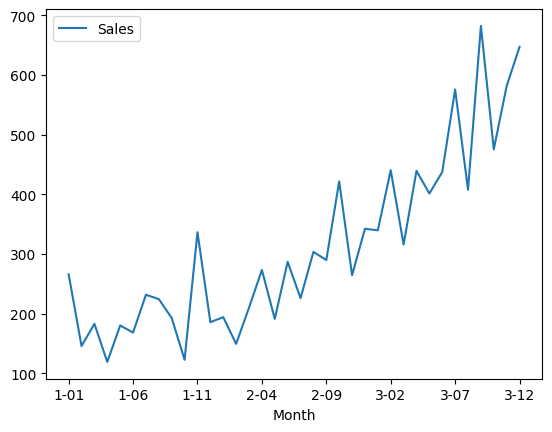

In [52]:
# load and plot dataset
from pandas import read_csv
import datetime
from matplotlib import pyplot
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# load dataset
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv',
                  header=0, parse_dates=[0], index_col=0, date_format='%Y-%m')
# summarize first few rows
print(series.head())
# line plot
series.plot()
pyplot.show()

In [53]:
# split data into train and test
X = series.values
train, test = X[0:-12], X[-12:]

RMSE: 136.761


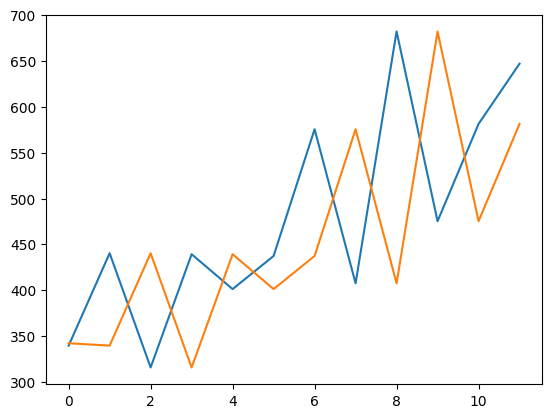

In [57]:
from pandas import read_csv
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# split data into train and test
X = series.values
train, test = X[0:-12], X[-12:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])
	# observation
	history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()

In [61]:
from pandas import read_csv
import datetime
from pandas import DataFrame
from pandas import concat

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# transform to supervised learning
X = series.values
supervised = timeseries_to_supervised(X, 1)
print(supervised.head())

       0      0
0    0.0  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3


In [67]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

In [68]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [ ]:
from pandas import read_csv
import datetime
from pandas import Series

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		print(dataset)
		print(dataset[0])
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]


# transform to be stationary
differenced = difference(series, 1)
print(differenced.head())
# invert transform
inverted = list()
for i in range(len(differenced)):
	value = inverse_difference(series, differenced[i], len(series)-i)
	inverted.append(value)
inverted = Series(inverted)
print(inverted.head())

In [58]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

In [ ]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

# date-time parsing function for loading the dataset
def parser(x):
	return datetime.datetime.strptime('190'+x, '%Y-%m') # Use datetime.datetime.strptime to call the function correctly.strptime('190'+x, '%Y-%m')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    # Pass input_shape to the first layer
    model.add(LSTM(neurons,  stateful=True, input_shape=(X.shape[1], X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model



# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# load dataset
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv',
                  header=0, parse_dates=[0], index_col=0, date_format='%Y-%m')

# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 3000, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

# report performance
rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-12:])
pyplot.plot(predictions)
pyplot.show()

In [ ]:
# repeat experiment
repeats = 30
error_scores = list()
for r in range(repeats):
	# fit the model
	lstm_model = fit_lstm(train_scaled, 1, 3000, 4)
	# forecast the entire training dataset to build up state for forecasting
	train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
	lstm_model.predict(train_reshaped, batch_size=1)
	# walk-forward validation on the test data
	predictions = list()
	for i in range(len(test_scaled)):
		# make one-step forecast
		X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
		yhat = forecast_lstm(lstm_model, 1, X)
		# invert scaling
		yhat = invert_scale(scaler, X, yhat)
		# invert differencing
		yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
		# store forecast
		predictions.append(yhat)
	# report performance
	rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
	print('%d) Test RMSE: %.3f' % (r+1, rmse))
	error_scores.append(rmse)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from math import sqrt
import matplotlib.pyplot as plt

# Frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

# Create a differenced series
def difference(dataset, interval=1):
    diff = []
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

# Invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# Scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

# Inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

# Fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])

    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)

    return model

# Make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

def main():
    # Load dataset
    # Note: Update the date parsing according to your actual data format
    # The original code had a hardcoded '190' prefix which might not be appropriate
    series = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', header=0, parse_dates=[0], index_col=0)

    # Transform data to be stationary
    raw_values = series.values
    diff_values = difference(raw_values, 1)

    # Transform data to be supervised learning
    supervised = timeseries_to_supervised(diff_values, 1)
    supervised_values = supervised.values

    # Split data into train and test-sets
    train, test = supervised_values[0:-12], supervised_values[-12:]

    # Transform the scale of the data
    scaler, train_scaled, test_scaled = scale(train, test)

    # Fit the model
    lstm_model = fit_lstm(train_scaled, 1, 3000, 4)

    # Forecast the entire training dataset to build up state for forecasting
    train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
    lstm_model.predict(train_reshaped, batch_size=1)

    # Walk-forward validation on the test data
    predictions = []
    for i in range(len(test_scaled)):
        # Make one-step forecast
        X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
        yhat = forecast_lstm(lstm_model, 1, X)
        # Invert scaling
        yhat = invert_scale(scaler, X, yhat)
        # Invert differencing
        yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
        # Store forecast
        predictions.append(yhat)
        expected = raw_values[len(train) + i + 1]
        print(f'Month={i+1}, Predicted={yhat:.1f}, Expected={expected:.1f}')

    # Report performance
    rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
    print(f'Test RMSE: {rmse:.3f}')

    # Line plot of observed vs predicted
    plt.plot(raw_values[-12:], label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    main()

Epoch 1/100


<ipython-input-81-45648dd62896>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filename, header=0, parse_dates=[0], index_col=0)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2728
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0726 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0499 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0983 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0433 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0434 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0523
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0714     
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0472 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0629 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0690 
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0543 
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1142 
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0376     
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0

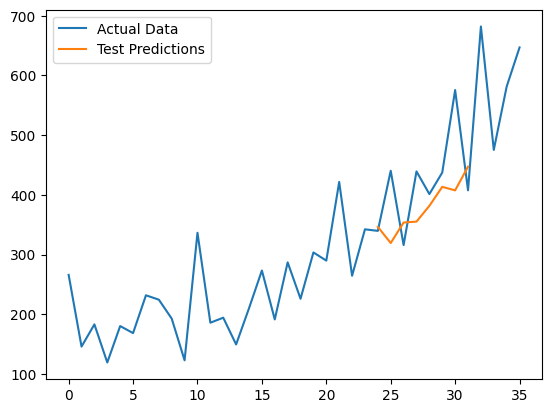

In [81]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
filename = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'
# 1. بارگذاری داده‌ها
def load_data(filename):
    df = pd.read_csv(filename, header=0, parse_dates=[0], index_col=0)
    series = df.squeeze()
    return series.values

# 2. تبدیل به داده نظارت شده
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data)-look_back-1):
        X.append(data[i:(i+look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# 3. تنظیم پارامترها
look_back = 3
epochs = 100
batch_size = 1

# 4. آماده‌سازی داده
data = load_data('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv')
data = data.reshape(-1, 1)

# 5. نرمال‌سازی داده‌ها
scaler = MinMaxScaler(feature_range=(-1, 1))
data_scaled = scaler.fit_transform(data)

# 6. ایجاد داده آموزش و تست
train_size = int(len(data_scaled) * 0.67)
test_size = len(data_scaled) - train_size
train, test = data_scaled[0:train_size,:], data_scaled[train_size:,:]

# 7. ایجاد مجموعه داده نظارت شده
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# 8. تغییر شکل داده برای LSTM [نمونه, گام زمانی, ویژگی]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 9. ساخت مدل LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# 10. آموزش مدل
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# 11. پیش‌بینی
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 12. معکوس‌سازی نرمال‌سازی
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# 13. محاسبه خطا
train_rmse = sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
test_rmse = sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')

# 14. رسم نتایج
plt.plot(scaler.inverse_transform(data_scaled), label='Actual Data')
plt.plot([None for _ in range(train_size)] + list(test_predict[:,0]), label='Test Predictions')
plt.legend()
plt.show()

In [76]:
# نمونه کد برای داده تکمتغیره
from keras.models import Sequential
from keras.layers import LSTM, Dense

# آماده‌سازی داده
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back-1):
        X.append(data[i:(i+look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# ساخت مدل
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

#Multistep Time Series Forecasting with LSTMs in Keras

In [84]:
# convert time series into supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [88]:


# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# convert time series into supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# transform series into train and test sets for supervised learning
def prepare_data(series, n_test, n_lag, n_seq):
	# extract raw values
	raw_values = series.values
	raw_values = raw_values.reshape(len(raw_values), 1)
	# transform into supervised learning problem X, y
	supervised = series_to_supervised(raw_values, n_lag, n_seq)
	supervised_values = supervised.values
	# split into train and test sets
	train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
	return train, test

# load dataset

# configure
n_lag = 1
n_seq = 3
n_test = 10
# prepare data
train, test = prepare_data(series, n_test, n_lag, n_seq)
print(test)
print('Train: %s, Test: %s' % (train.shape, test.shape))

[[342.3 339.7 440.4 315.9]
 [339.7 440.4 315.9 439.3]
 [440.4 315.9 439.3 401.3]
 [315.9 439.3 401.3 437.4]
 [439.3 401.3 437.4 575.5]
 [401.3 437.4 575.5 407.6]
 [437.4 575.5 407.6 682. ]
 [575.5 407.6 682.  475.3]
 [407.6 682.  475.3 581.3]
 [682.  475.3 581.3 646.9]]
Train: (23, 4), Test: (10, 4)


In [89]:
# make a persistence forecast
def persistence(last_ob, n_seq):
	return [last_ob for i in range(n_seq)]

In [90]:
# evaluate the persistence model
def make_forecasts(train, test, n_lag, n_seq):
	forecasts = list()
	for i in range(len(test)):
		X, y = test[i, 0:n_lag], test[i, n_lag:]
		# make forecast
		forecast = persistence(X[-1], n_seq)
		# store the forecast
		forecasts.append(forecast)
	return forecasts

In [91]:
# evaluate the RMSE for each forecast time step
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
	for i in range(n_seq):
		actual = test[:,(n_lag+i)]
		predicted = [forecast[i] for forecast in forecasts]
		rmse = sqrt(mean_squared_error(actual, predicted))
		print('t+%d RMSE: %f' % ((i+1), rmse))

In [ ]:
evaluate_forecasts(test, forecasts, 1, 3)

In [95]:
# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
	# plot the entire dataset in blue
	pyplot.plot(series.values)
	# plot the forecasts in red
	for i in range(len(forecasts)):
		off_s = len(series) - n_test + i
		off_e = off_s + len(forecasts[i])
		xaxis = [x for x in range(off_s, off_e)]
		pyplot.plot(xaxis, forecasts[i], color='red')
	# show the plot
	pyplot.show()

In [ ]:
# plot forecasts
plot_forecasts(series, forecasts, 12)

In [97]:
# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
	# plot the entire dataset in blue
	pyplot.plot(series.values)
	# plot the forecasts in red
	for i in range(len(forecasts)):
		off_s = len(series) - 12 + i - 1
		off_e = off_s + len(forecasts[i]) + 1
		xaxis = [x for x in range(off_s, off_e)]
		yaxis = [series.values[off_s]] + forecasts[i]
		pyplot.plot(xaxis, yaxis, color='red')
	# show the plot
	pyplot.show()

t+1 RMSE: 144.535304
t+2 RMSE: 86.479905
t+3 RMSE: 121.149168


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

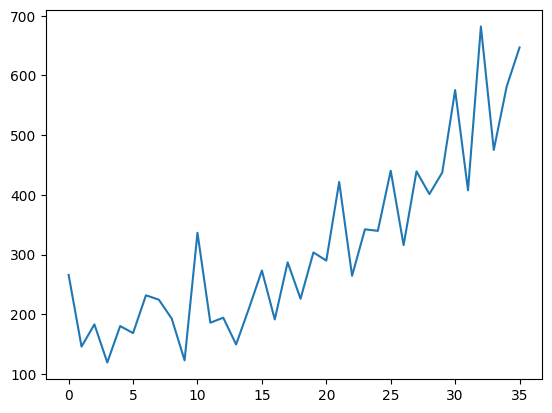

In [100]:
from pandas import DataFrame
from pandas import concat
from pandas import read_csv

from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# convert time series into supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# transform series into train and test sets for supervised learning
def prepare_data(series, n_test, n_lag, n_seq):
	# extract raw values
	raw_values = series.values
	raw_values = raw_values.reshape(len(raw_values), 1)
	# transform into supervised learning problem X, y
	supervised = series_to_supervised(raw_values, n_lag, n_seq)
	supervised_values = supervised.values
	# split into train and test sets
	train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
	return train, test

# make a persistence forecast
def persistence(last_ob, n_seq):
	return [last_ob for i in range(n_seq)]

# evaluate the persistence model
def make_forecasts(train, test, n_lag, n_seq):
	forecasts = list()
	for i in range(len(test)):
		X, y = test[i, 0:n_lag], test[i, n_lag:]
		# make forecast
		forecast = persistence(X[-1], n_seq)
		# store the forecast
		forecasts.append(forecast)
	return forecasts

# evaluate the RMSE for each forecast time step
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
	for i in range(n_seq):
		actual = test[:,(n_lag+i)]
		predicted = [forecast[i] for forecast in forecasts]
		rmse = sqrt(mean_squared_error(actual, predicted))
		print('t+%d RMSE: %f' % ((i+1), rmse))

# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
	# plot the entire dataset in blue
	pyplot.plot(series.values)
	# plot the forecasts in red
	for i in range(len(forecasts)):
		off_s = len(series) - n_test + i - 1
		off_e = off_s + len(forecasts[i]) + 1
		xaxis = [x for x in range(off_s, off_e)]
		yaxis = [series.values[off_s]] + forecasts[i]
		pyplot.plot(xaxis, yaxis, color='red')
	# show the plot
	pyplot.show()

# load dataset
# configure
n_lag = 1
n_seq = 3
n_test = 10
# prepare data
train, test = prepare_data(series, n_test, n_lag, n_seq)
# make forecasts
forecasts = make_forecasts(train, test, n_lag, n_seq)
# evaluate forecasts
evaluate_forecasts(test, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

In [ ]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import array

# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# convert time series into supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# transform series into train and test sets for supervised learning
def prepare_data(series, n_test, n_lag, n_seq):
	# extract raw values
	raw_values = series.values
	# transform data to be stationary
	diff_series = difference(raw_values, 1)
	diff_values = diff_series.values
	diff_values = diff_values.reshape(len(diff_values), 1)
	# rescale values to -1, 1
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaled_values = scaler.fit_transform(diff_values)
	scaled_values = scaled_values.reshape(len(scaled_values), 1)
	# transform into supervised learning problem X, y
	supervised = series_to_supervised(scaled_values, n_lag, n_seq)
	supervised_values = supervised.values
	# split into train and test sets
	train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
	return scaler, train, test

# fit an LSTM network to training data
def fit_lstm(train, n_lag, n_seq, n_batch, nb_epoch, n_neurons):
	# reshape training into [samples, timesteps, features]
	X, y = train[:, 0:n_lag], train[:, n_lag:]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	# design network
	model = Sequential()
	model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(y.shape[1]))
	model.compile(loss='mean_squared_error', optimizer='adam')
	# fit network
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=n_batch, verbose=0, shuffle=False)
		model.reset_states()
	return model

# make one forecast with an LSTM,
def forecast_lstm(model, X, n_batch):
	# reshape input pattern to [samples, timesteps, features]
	X = X.reshape(1, 1, len(X))
	# make forecast
	forecast = model.predict(X, batch_size=n_batch)
	# convert to array
	return [x for x in forecast[0, :]]

# evaluate the persistence model
def make_forecasts(model, n_batch, train, test, n_lag, n_seq):
	forecasts = list()
	for i in range(len(test)):
		X, y = test[i, 0:n_lag], test[i, n_lag:]
		# make forecast
		forecast = forecast_lstm(model, X, n_batch)
		# store the forecast
		forecasts.append(forecast)
	return forecasts

# invert differenced forecast
def inverse_difference(last_ob, forecast):
	# invert first forecast
	inverted = list()
	inverted.append(forecast[0] + last_ob)
	# propagate difference forecast using inverted first value
	for i in range(1, len(forecast)):
		inverted.append(forecast[i] + inverted[i-1])
	return inverted

# inverse data transform on forecasts
def inverse_transform(series, forecasts, scaler, n_test):
	inverted = list()
	for i in range(len(forecasts)):
		# create array from forecast
		forecast = array(forecasts[i])
		forecast = forecast.reshape(1, len(forecast))
		# invert scaling
		inv_scale = scaler.inverse_transform(forecast)
		inv_scale = inv_scale[0, :]
		# invert differencing
		index = len(series) - n_test + i - 1
		last_ob = series.values[index]
		inv_diff = inverse_difference(last_ob, inv_scale)
		# store
		inverted.append(inv_diff)
	return inverted

# evaluate the RMSE for each forecast time step
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
	for i in range(n_seq):
		actual = [row[i] for row in test]
		predicted = [forecast[i] for forecast in forecasts]
		rmse = sqrt(mean_squared_error(actual, predicted))
		print('t+%d RMSE: %f' % ((i+1), rmse))

# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
	# plot the entire dataset in blue
	pyplot.plot(series.values)
	# plot the forecasts in red
	for i in range(len(forecasts)):
		off_s = len(series) - n_test + i - 1
		off_e = off_s + len(forecasts[i]) + 1
		xaxis = [x for x in range(off_s, off_e)]
		yaxis = [series.values[off_s]] + forecasts[i]
		pyplot.plot(xaxis, yaxis, color='red')
	# show the plot
	pyplot.show()

# load dataset
# configure
n_lag = 1
n_seq = 3
n_test = 10
n_epochs = 1500
n_batch = 1
n_neurons = 1
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

Epoch 1/100


<ipython-input-85-1317000fe09a>:66: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', header=0, parse_dates=[0], index_col=0).squeeze()
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.3461
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.3423
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3386
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3350
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3314
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3279
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3245
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3211
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3179
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3148
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3117
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3086
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3056
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3025
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2994
Epoch 16/100
1/1 ━━━━━━━━━━━━━━━━

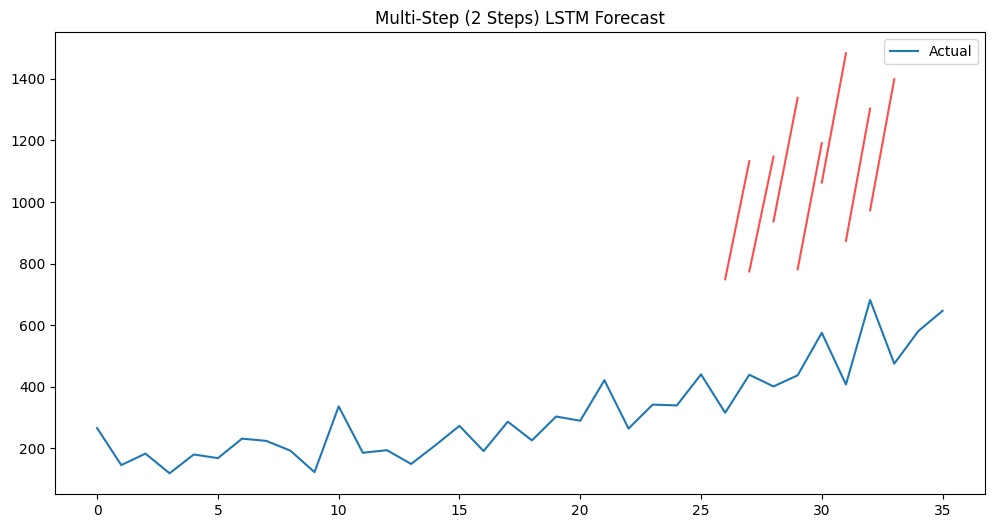

In [85]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from math import sqrt
import matplotlib.pyplot as plt

# 1. آماده‌سازی داده‌ها
def prepare_data(data, n_steps_in, n_steps_out, test_size=0.2):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled = scaler.fit_transform(data.values.reshape(-1, 1))

    X, y = [], []
    for i in range(len(scaled)-n_steps_in-n_steps_out+1):
        X.append(scaled[i:i+n_steps_in, 0])
        y.append(scaled[i+n_steps_in:i+n_steps_in+n_steps_out, 0])

    X, y = np.array(X), np.array(y)

    split = int(len(X) * (1-test_size))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    return scaler, X_train, y_train, X_test, y_test

# 2. ساخت مدل LSTM
def build_lstm_model(n_steps_in, n_steps_out, units=50):
    model = Sequential()
    model.add(LSTM(units, activation='relu', input_shape=(n_steps_in, 1)))
    model.add(Dense(n_steps_out))
    model.compile(optimizer='adam', loss='mse')
    return model

# 3. تبدیل پیش‌بینی به مقیاس اصلی
def inverse_transform(scaler, forecasts, actual):
    inverted = []
    for i in range(len(forecasts)):
        inv_scale = scaler.inverse_transform(forecasts[i].reshape(-1, 1)).flatten()
        last_ob = actual[len(actual) - len(forecasts) + i - 1]
        inv_diff = [last_ob + inv_scale[0]]
        for j in range(1, len(inv_scale)):
            inv_diff.append(inv_diff[-1] + inv_scale[j])
        inverted.append(inv_diff)
    return inverted

# 4. ارزیابی مدل
def evaluate_model(y_true, y_pred, n_steps_out):
    scores = []
    for i in range(n_steps_out):
        rmse = sqrt(mean_squared_error(y_true[:,i], y_pred[:,i]))
        scores.append(rmse)
        print(f't+{i+1} RMSE: {rmse:.2f}')
    return scores

# 5. اجرای اصلی
if __name__ == "__main__":
    # پارامترها
    n_steps_in = 3
    n_steps_out = 2
    epochs = 100
    batch_size = 32

    # بارگیری داده
    data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', header=0, parse_dates=[0], index_col=0).squeeze()

    # آماده‌سازی داده
    scaler, X_train, y_train, X_test, y_test = prepare_data(data, n_steps_in, n_steps_out)

    # تغییر شکل داده
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # ساخت و آموزش مدل
    model = build_lstm_model(n_steps_in, n_steps_out)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

    # پیش‌بینی
    y_pred = model.predict(X_test)

    # تبدیل به مقیاس اصلی
    y_true_inv = inverse_transform(scaler, y_test, data.values)
    y_pred_inv = inverse_transform(scaler, y_pred, data.values)

    # ارزیابی
    scores = evaluate_model(np.array(y_true_inv), np.array(y_pred_inv), n_steps_out)

    # رسم نتایج
    plt.figure(figsize=(12,6))
    plt.plot(data.values, label='Actual')

    # اصلاح بخش رسم نمودار
    for i in range(len(y_pred_inv)):
        start_idx = len(data) - len(y_test) - n_steps_in + i
        x_values = range(start_idx, start_idx + len(y_pred_inv[i]))
        plt.plot(x_values, y_pred_inv[i], 'r-', alpha=0.7)

    plt.title(f'Multi-Step ({n_steps_out} Steps) LSTM Forecast')
    plt.legend()
    plt.show()

#Multivariate Time Series Forecasting with LSTMs in Python

In [20]:

from math import sqrt
from numpy import concatenate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# تبدیل سری زمانی به داده نظارت شده
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()

    # ورودی (t-n, ..., t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

    # خروجی (t)
    cols.append(df.shift(0))
    names += [('var%d(t)' % (j+1)) for j in range(n_vars)]

    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg


# بارگیری و پیش‌پردازش داده
dataset = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv', header=0, index_col=0)
values = dataset.values



# کدگذاری ویژگی جهت باد
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
df[4] = df[4].astype(str)
print(df.columns)  # نمایش نام ستون‌ها
print(df.head())  # نمایش چند سطر اول
print(df[4].dtype)  # بررسی نوع داده‌های ستون

#df = df[df[4].apply(lambda x: x.replace('.', '', 1).isdigit())]
#df = df[df[4].apply(lambda x: x if isinstance(x, str) and x.replace('.', '', 1).isdigit() else None)]
df[4] = pd.to_numeric(df[4], errors='coerce')  # تبدیل مقدارهای غیر عددی به NaN
df = df.dropna(subset=[4])  # حذف مقدارهای غیر عددی

# df = pd.DataFrame(values)
# df = df[df[4].apply(lambda x: x.replace('.', '', 1).isdigit())]  # حذف مقدارهای غیر عددی
df = df.drop(df.columns[8], axis=1)  # حذف ستون شماره 4
values = df.to_numpy()

values = values.astype('float32')

# نرمال‌سازی
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# پارامترهای مدل
n_hours = 3
n_features = 8
target_var = 0  # شاخص متغیر هدف (pollution)

# ایجاد داده نظارت شده
reframed = series_to_supervised(scaled, n_hours, 1)
values = reframed.values

# تقسیم داده به آموزش و آزمون
n_train_hours = 365 * 24
train = values[:n_train_hours]
test = values[n_train_hours:]

n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features + target_var]
test_X, test_y = test[:, :n_obs], test[:, -n_features + target_var]

# تغییر شکل داده برای LSTM
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

# ساخت مدل
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_hours, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# آموزش مدل
history = model.fit(
    train_X, train_y,
    epochs=50,
    batch_size=72,
    validation_data=(test_X, test_y),
    verbose=2,
    shuffle=False
)



RangeIndex(start=0, stop=12, step=1)
     0  1  2  3    4    5     6       7   8      9  10 11
0  2010  1  1  0  581  -21 -11.0  1021.0  NW   1.79  0  0
1  2010  1  1  1  581  -21 -12.0  1020.0  NW   4.92  0  0
2  2010  1  1  2  581  -21 -11.0  1019.0  NW   6.71  0  0
3  2010  1  1  3  581  -21 -14.0  1019.0  NW   9.84  0  0
4  2010  1  1  4  581  -20 -12.0  1018.0  NW  12.97  0  0
object
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


122/122 - 3s - 24ms/step - loss: 0.1167 - val_loss: 0.1179
Epoch 2/50
122/122 - 1s - 11ms/step - loss: 0.0651 - val_loss: 0.1440
Epoch 3/50
122/122 - 1s - 11ms/step - loss: 0.0532 - val_loss: 0.1244
Epoch 4/50
122/122 - 1s - 11ms/step - loss: 0.0464 - val_loss: 0.1306
Epoch 5/50
122/122 - 1s - 11ms/step - loss: 0.0408 - val_loss: 0.1290
Epoch 6/50
122/122 - 1s - 11ms/step - loss: 0.0377 - val_loss: 0.1294
Epoch 7/50
122/122 - 1s - 11ms/step - loss: 0.0358 - val_loss: 0.1319
Epoch 8/50
122/122 - 1s - 11ms/step - loss: 0.0335 - val_loss: 0.1291
Epoch 9/50
122/122 - 1s - 11ms/step - loss: 0.0314 - val_loss: 0.1305
Epoch 10/50
122/122 - 1s - 11ms/step - loss: 0.0295 - val_loss: 0.1299
Epoch 11/50
122/122 - 1s - 11ms/step - loss: 0.0278 - val_loss: 0.1328
Epoch 12/50
122/122 - 1s - 11ms/step - loss: 0.0265 - val_loss: 0.1347
Epoch 13/50
122/122 - 1s - 11ms/step - loss: 0.0256 - val_loss: 0.1340
Epoch 14/50
122/122 - 1s - 10ms/step - loss: 0.0245 - val_loss: 0.1406
Epoch 15/50
122/122 - 1s -

ValueError: operands could not be broadcast together with shapes (35061,8) (11,) (35061,8) 

In [25]:
# پیش‌بینی و ارزیابی
yhat = model.predict(test_X)

# معکوس‌سازی نرمال‌سازی
test_X_flat = test_X.reshape((test_X.shape[0], n_hours * n_features))
inv_yhat = concatenate((yhat, test_X_flat[:, -n_features + 1:]), axis=1)
print(inv_yhat.shape)  # بررسی ابعاد inv_yhat
print(scaler.min_.shape)  # بررسی ابعاد min_
print(scaler.scale_.shape)  # بررسی ابعاد scale_
print(yhat.shape)
print(test_X_flat[:, -n_features + 1:].shape)

inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, target_var]

test_y_reshaped = test_y.reshape(-1, 1)
inv_y = concatenate((test_y_reshaped, test_X_flat[:, -n_features + 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, target_var]
print(yhat.shape)
print(test_X_flat[:, -n_features + 1:].shape)

# محاسبه RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print(f'Test RMSE: {rmse:.3f}')

# رسم نتایج
plt.figure(figsize=(12,6))
plt.plot(inv_y, label='Actual')
plt.plot(inv_yhat, label='Predicted')
plt.legend()
plt.title('Air Pollution Prediction using LSTM')
plt.show()

1096/1096 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
(35061, 8)
(1, 11)
(1, 11)
(35061, 1)
(35061, 7)


ValueError: operands could not be broadcast together with shapes (35061,8) (1,11) (35061,8) 

In [ ]:
from math import sqrt
from numpy import concatenate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# تبدیل سری زمانی به داده نظارت شده
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()

    # ورودی (t-n, ..., t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

    # خروجی (t)
    cols.append(df.shift(0))
    names += [('var%d(t)' % (j+1)) for j in range(n_vars)]

    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# بارگیری و پیش‌پردازش داده
dataset = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv', header=0, index_col=0)
values = dataset.values

# کدگذاری ویژگی جهت باد
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
df[4] = pd.to_numeric(df[4], errors='coerce')  # تبدیل مقدارهای غیر عددی به NaN
df = df.dropna(subset=[4])  # حذف مقدارهای غیر عددی

# df = pd.DataFrame(values)
# df = df[df[4].apply(lambda x: x.replace('.', '', 1).isdigit())]  # حذف مقدارهای غیر عددی
df = df.drop(df.columns[8], axis=1)  # حذف ستون شماره 4
values = df.to_numpy()

values = values.astype('float32')
df = df.drop(df.columns[8], axis=1)
values = values.astype('float32')

# نرمال‌سازی
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# پارامترهای مدل
n_hours = 3
n_features = 8
target_var = 0  # شاخص متغیر هدف (pollution)

# ایجاد داده نظارت شده
reframed = series_to_supervised(scaled, n_hours, 1)
values = reframed.values

# تقسیم داده به آموزش و آزمون
n_train_hours = 365 * 24
train = values[:n_train_hours]
test = values[n_train_hours:]

n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features + target_var]
test_X, test_y = test[:, :n_obs], test[:, -n_features + target_var]

# تغییر شکل داده برای LSTM
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

# ساخت مدل
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_hours, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# آموزش مدل
history = model.fit(
    train_X, train_y,
    epochs=20,
    batch_size=72,
    validation_data=(test_X, test_y),
    verbose=2,
    shuffle=False
)

# پیش‌بینی
yhat = model.predict(test_X)

# آماده‌سازی داده برای معکوس‌سازی نرمال‌سازی
test_X_flat = test_X.reshape((test_X.shape[0], n_hours * n_features))

# ایجاد آرایه‌های خالی با شکل مناسب
inv_yhat = np.zeros((len(yhat), n_features))
inv_y = np.zeros((len(test_y), n_features))

# پر کردن ستون‌های مربوطه
inv_yhat[:, target_var] = yhat.flatten()
inv_y[:, target_var] = test_y.flatten()

# پر کردن سایر ویژگی‌ها با مقادیر اصلی
inv_yhat[:, target_var+1:] = test_X_flat[:, -n_features+1:]
inv_y[:, target_var+1:] = test_X_flat[:, -n_features+1:]

# معکوس‌سازی نرمال‌سازی
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_y = scaler.inverse_transform(inv_y)

# استخراج مقادیر پیش‌بینی شده و واقعی
inv_yhat = inv_yhat[:, target_var]
inv_y = inv_y[:, target_var]

# محاسبه RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print(f'Test RMSE: {rmse:.3f}')

# رسم نتایج
plt.figure(figsize=(12,6))
plt.plot(inv_y[:100], label='Actual')
plt.plot(inv_yhat[:100], label='Predicted')
plt.legend()
plt.title('Air Pollution Prediction - First 100 Samples')
plt.show()

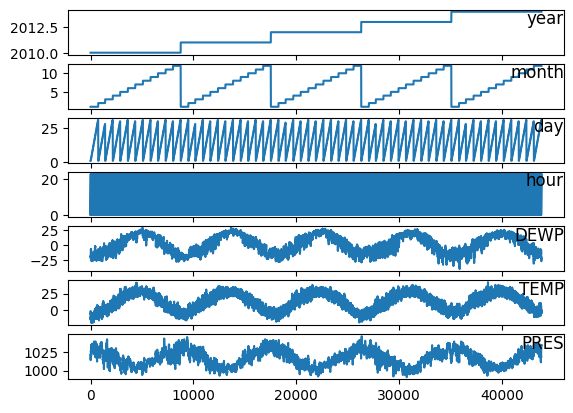

In [4]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [ ]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# integer encode direction
encoder = LabelEncoder()
df[4] = pd.to_numeric(df[4], errors='coerce')  # تبدیل مقدارهای غیر عددی به NaN
df = df.dropna(subset=[4])  # حذف مقدارهای غیر عددی

# df = pd.DataFrame(values)
# df = df[df[4].apply(lambda x: x.replace('.', '', 1).isdigit())]  # حذف مقدارهای غیر عددی
df = df.drop(df.columns[8], axis=1)  # حذف ستون شماره 4
values = df.to_numpy()

values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


122/122 - 3s - 24ms/step - loss: 0.0241 - val_loss: 0.0503
Epoch 2/50
122/122 - 1s - 9ms/step - loss: 0.0183 - val_loss: 0.0326
Epoch 3/50
122/122 - 1s - 9ms/step - loss: 0.0163 - val_loss: 0.0530
Epoch 4/50
122/122 - 1s - 9ms/step - loss: 0.0168 - val_loss: 0.0561
Epoch 5/50
122/122 - 1s - 9ms/step - loss: 0.0129 - val_loss: 0.0458
Epoch 6/50
122/122 - 1s - 9ms/step - loss: 0.0130 - val_loss: 0.0559
Epoch 7/50
122/122 - 1s - 9ms/step - loss: 0.0097 - val_loss: 0.0665
Epoch 8/50
122/122 - 1s - 9ms/step - loss: 0.0104 - val_loss: 0.0536
Epoch 9/50
122/122 - 1s - 9ms/step - loss: 0.0126 - val_loss: 0.0749
Epoch 10/50
122/122 - 1s - 9ms/step - loss: 0.0104 - val_loss: 0.0610
Epoch 11/50
122/122 - 1s - 9ms/step - loss: 0.0094 - val_loss: 0.0609
Epoch 12/50
122/122 - 1s - 8ms/step - loss: 0.0104 - val_loss: 0.0762
Epoch 13/50
122/122 - 1s - 9ms/step - loss: 0.0099 - val_loss: 0.0544
Epoch 14/50
122/122 - 1s - 8ms/step - loss: 0.0091 - val_loss: 0.0473
Epoch 15/50
122/122 - 1s - 8ms/step - l

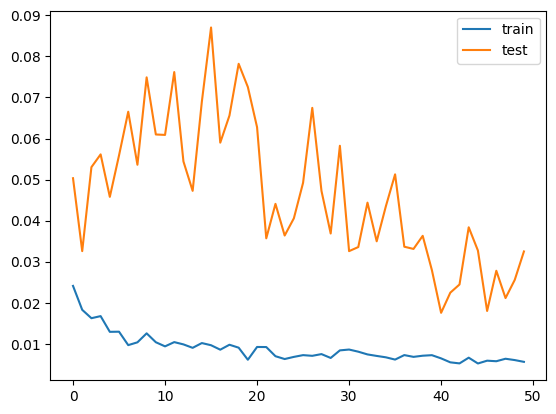

In [39]:
...
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [40]:
...
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

1096/1096 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


ValueError: operands could not be broadcast together with shapes (35061,35) (9,) (35061,35) 

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1        0.0        0.0        0.0   0.000000        1.0   0.279412   
2        0.0        0.0        0.0   0.043478        1.0   0.279412   
3        0.0        0.0        0.0   0.086957        1.0   0.279412   
4        0.0        0.0        0.0   0.130435        1.0   0.279412   
5        0.0        0.0        0.0   0.173913        1.0   0.294118   

   var7(t-1)  var8(t-1)  var9(t-1)  var17(t-1)  ...  var27(t)  var28(t)  \
1   0.131148   0.545454        0.0    0.527273  ...       0.0       0.0   
2   0.114754   0.527273        0.0    0.509090  ...       0.0       0.0   
3   0.131148   0.509090        0.0    0.509090  ...       0.0       0.0   
4   0.081967   0.509090        0.0    0.490910  ...       0.0       0.0   
5   0.114754   0.490910        0.0    0.472727  ...       0.0       0.0   

   var29(t)  var30(t)  var31(t)  var32(t)  var33(t)  var34(t)  var35(t)  \
1       0.0       0.0  0.173913       1.0  0.29

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


122/122 - 3s - 22ms/step - loss: 0.0304 - val_loss: 0.0459
Epoch 2/50
122/122 - 1s - 9ms/step - loss: 0.0214 - val_loss: 0.0395
Epoch 3/50
122/122 - 1s - 9ms/step - loss: 0.0183 - val_loss: 0.0135
Epoch 4/50
122/122 - 1s - 9ms/step - loss: 0.0138 - val_loss: 0.0335
Epoch 5/50
122/122 - 1s - 9ms/step - loss: 0.0152 - val_loss: 0.0166
Epoch 6/50
122/122 - 1s - 9ms/step - loss: 0.0122 - val_loss: 0.0255
Epoch 7/50
122/122 - 1s - 8ms/step - loss: 0.0109 - val_loss: 0.0476
Epoch 8/50
122/122 - 1s - 9ms/step - loss: 0.0119 - val_loss: 0.0273
Epoch 9/50
122/122 - 1s - 9ms/step - loss: 0.0106 - val_loss: 0.0092
Epoch 10/50
122/122 - 1s - 9ms/step - loss: 0.0115 - val_loss: 0.0124
Epoch 11/50
122/122 - 1s - 9ms/step - loss: 0.0096 - val_loss: 0.0302
Epoch 12/50
122/122 - 1s - 9ms/step - loss: 0.0084 - val_loss: 0.0321
Epoch 13/50
122/122 - 1s - 9ms/step - loss: 0.0089 - val_loss: 0.0226
Epoch 14/50
122/122 - 1s - 9ms/step - loss: 0.0077 - val_loss: 0.0303
Epoch 15/50
122/122 - 1s - 9ms/step - l

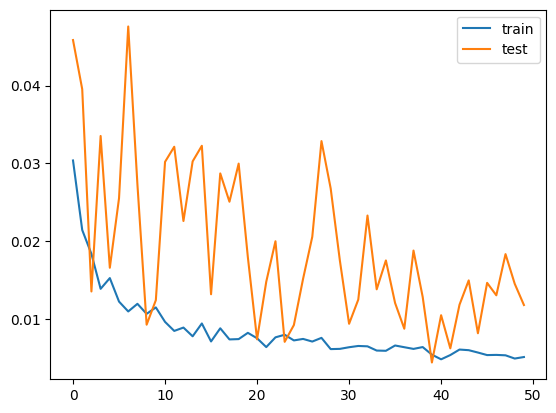

1096/1096 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


ValueError: operands could not be broadcast together with shapes (35060,64) (36,) (35060,64) 

In [42]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset

# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [43]:
...
# specify the number of lag hours
n_hours = 3
n_features = 8
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)

In [44]:
...
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)

(8760, 24) 8760 (8760,)


In [45]:
...
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))